# Black-Scholes-Merton Model in Python



In [15]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
N = norm.cdf

In [16]:
def BSM_call_price(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T)) 
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T) * N(d2) 

In [86]:
def BSM_put_price(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * N(-d2) - S * N(-d1)

Checking the model through a graph

As the price increase, the price of call increases and the price of put decreases. As shown through the graph

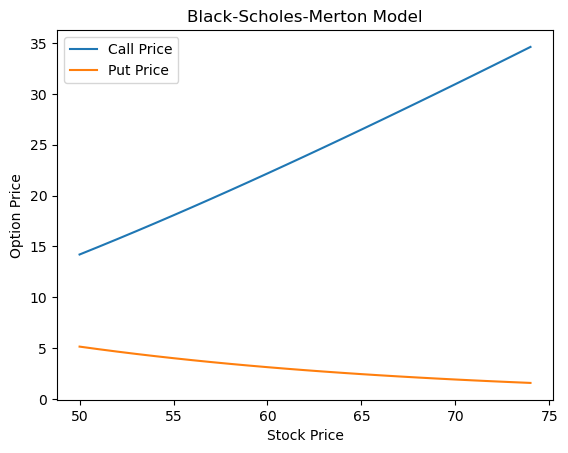

In [87]:
K = 50
r = 0.2
T = 1
sigma = 0.5

S = np.arange(50,75) 



calls = []
for s in S: 
  x = BSM_call_price(s, K , T , r ,sigma)
  calls.append(x)

puts = []
for s in S: 
  x = BSM_put_price(s, K , T , r ,sigma)
  puts.append(x)

plt.plot(S,calls, label = 'Call Price')
plt.plot(S,puts, label = 'Put Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Black-Scholes-Merton Model')
plt.legend()

# CHECKING THE PRICE OF OPTIONS OF GOOGLE THROUGH THE MODEL

In [18]:
import yfinance as yf


In [70]:
Google= yf.Ticker('GOOG')
Google.options

('2023-03-31',
 '2023-04-06',
 '2023-04-14',
 '2023-04-21',
 '2023-04-28',
 '2023-05-05',
 '2023-05-19',
 '2023-06-16',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-10-20',
 '2023-11-17',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

In [71]:
option = Google.option_chain('2023-04-06')
option
calls = option.calls

calls[calls['strike'].between(98,101)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
22,GOOG230406C00098000,2023-03-30 19:56:02+00:00,98.0,3.90,0.0,0.0,0.0,0.0,208.0,555,0.00001,True,REGULAR,USD
23,GOOG230406C00099000,2023-03-30 19:58:25+00:00,99.0,3.09,0.0,0.0,0.0,0.0,458.0,832,0.00001,True,REGULAR,USD
24,GOOG230406C00100000,2023-03-30 19:59:45+00:00,100.0,2.42,0.0,0.0,0.0,0.0,1733.0,2381,0.00001,True,REGULAR,USD
25,GOOG230406C00101000,2023-03-30 19:58:45+00:00,101.0,1.78,0.0,0.0,0.0,0.0,2052.0,1011,0.00001,True,REGULAR,USD


In [78]:
Google2 = yf.download('GOOG', start = '2023-01-01', end = '2023-03-30')


[*********************100%***********************]  1 of 1 completed


Determining the annualized standard deviation

In [79]:
Google2['pct_change'] = Google2.Close.pct_change()
Google2['log_return'] = np.log(1 + Google2['pct_change'])
std = Google2['log_return'].std()
annualized_sigma = std * np.sqrt(252)
annualized_sigma

0.39868800689287015

# Determining the call price

In [90]:
BSM_call_price(101.32,100,0.023,0.0374,annualized_sigma)

3.1941696988764363

In [84]:
option_put = Google.option_chain('2023-04-06')
option_put
puts = option.puts
puts[puts['strike'].between(105,110)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
32,GOOG230406P00105000,2023-03-30 19:57:46+00:00,105.0,4.10,0.0,0.0,0.0,0.0,88.0,393,0.00001,True,REGULAR,USD
33,GOOG230406P00106000,2023-03-30 19:52:23+00:00,106.0,4.85,0.0,0.0,0.0,0.0,20.0,784,0.00001,True,REGULAR,USD
34,GOOG230406P00107000,2023-03-30 19:10:39+00:00,107.0,6.10,0.0,0.0,0.0,0.0,16.0,655,0.00001,True,REGULAR,USD
35,GOOG230406P00108000,2023-03-30 19:48:55+00:00,108.0,6.62,0.0,0.0,0.0,0.0,61.0,407,0.00001,True,REGULAR,USD
36,GOOG230406P00109000,2023-03-30 19:11:59+00:00,109.0,7.82,0.0,0.0,0.0,0.0,5.0,125,0.00001,True,REGULAR,USD
37,GOOG230406P00110000,2023-03-30 19:32:34+00:00,110.0,8.80,0.0,0.0,0.0,0.0,126.0,180,0.00001,True,REGULAR,USD


# Determining the put price

In [85]:
BSM_put_price(101.32,110,0.023,0.0374,annualized_sigma)`

8.849002235324832